# TP: Perceptron and SVM on linearly seperable data
1. Implement the Perceptron algorithm for binary classfication
2. Learn how to use Linear SVM with scikit-learn
3. Understand the behavior of the test error of each method

(Ce TP doit être réalisé en une séance de 2h.)

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import sklearn
from sklearn.datasets import make_classification
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import confusion_matrix,accuracy_score

# Data generation

In [2]:
n_samples, n_features = 200, 300
X, y = make_classification(
    n_samples=n_samples, n_features=n_features, n_informative=2, n_clusters_per_class = 1,
    n_redundant= 0, n_repeated = 0,
    class_sep = 2, shuffle = False, flip_y = 0, 
)
y[y==0] = -1 # NOTE that the lable values are 0 or 1, convert to -1 or 1

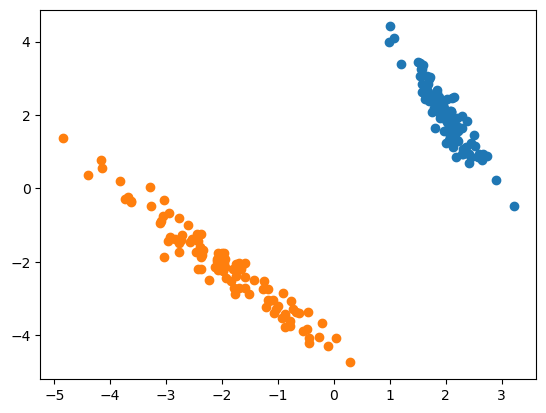

In [3]:
# Plot the first 2 features of x to check visually that the dataset is linearly seperable
# random permutation of samples
perm = np.random.permutation(n_samples)
X = X[perm,:]
y = y[perm]
plt.scatter( X[y==-1, 0],  X[y==-1, 1] )
plt.scatter( X[y==1, 0],  X[y==1, 1] )

In [4]:
# split the data into training and test set, with 1:1 ratio
X_train = X[0:n_samples//2,:]
y_train = y[0:n_samples//2]
X_test = X[n_samples//2:,:]
y_test = y[n_samples//2:]

# I. Perceptron algorithm
### I.1 Implement the following algorithm:

    w in R^N, b in R         
    Init k =0,  initial each value of w and b to 0
    Repeat
        for i=1 .. m do
            if sign ( w'x_i + b ) is y_i, then
                do nothing
            else
                if y_i is 1, then            
                    w = w + x_i
                    b = b + 1
                else
                    w = w - x_i
                    b = b - 1
                end
                k = k + 1 # nb of corrections
            end
        end
        STOP if k is larger than kmax, or if there is no more corrections

In [5]:
kmax = 100 # choose a suitable value
m = n_samples//2
N = n_features
w = np.zeros(N)
b = 0
k = 0
correction = True

while k < kmax and correction:
    correction = False
    for i in range(1, m+1):
        if np.sign(np.dot(w, X_train[i-1,:]) + b) == y_train[i-1]:
            continue
        else:
            if y_train[i-1] == 1:
                w = w + X_train[i-1,:]
                b = b + 1
            else:
                w = w - X_train[i-1,:]
                b = b - 1
            k = k + 1
            correction = True
    
print('k =', k)

k = 10


### I.2 compute the training and test error

In [6]:
training_error = 0
for i in range(m):
    if np.sign(np.dot(w, X_train[i,:]) + b) != y_train[i]:
        training_error += 1
training_error /= m
print('training error is', training_error)

training error is 0.0


In [7]:
test_error = 0
for i in range(n_samples//2):
    if np.sign(np.dot(w, X_test[i,:]) + b) != y_test[i]:
        test_error += 1
test_error /= (n_samples//2)
print('test error is', test_error)

test error is 0.04


### I.3 compute the margin of the Perceptron classifier

In [8]:
# calculate the margin
margin = np.min([np.abs( (np.dot(w,X_train[i,:])+b  )  ) / np.sqrt(np.dot(w,w)) for i in range(m)])
print(margin)

0.09228230034545276


# II. Linear SVM method
* Train the SVM classifier clf using X_train and y_train
* Compare and analyze the training and test error, e.g. make a connection to the margin of each classifier

In [9]:
# Set a proper kernel and parameter C for SVC
clf = SVC(kernel='linear', C=1e10)

Text(0.5, 1.0, 'Train ; accuracy=1.00')

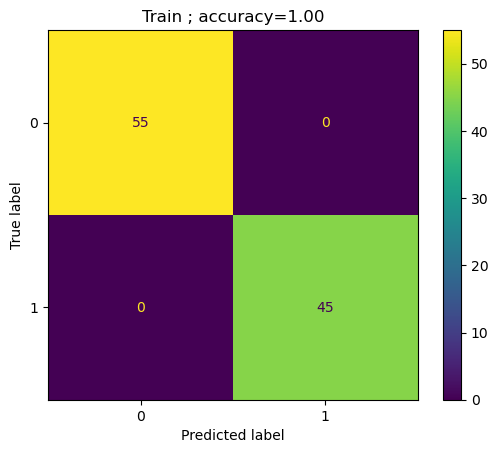

In [10]:
# TODO you may display the confusion matrix of the classfication with disp = sklearn.metrics.ConfusionMatrixDisplay(...)
disp = sklearn.metrics.ConfusionMatrixDisplay(confusion_matrix(y_test, clf.fit(X_train, y_train).predict(X_test)))
disp.plot()
accuracyTrain = accuracy_score(y_train, clf.predict(X_train))
plt.title(f'Train ; accuracy={accuracyTrain:.2f}')

In [11]:
# TODO get the weight and bias in SVM
w = clf.coef_[0]
b = clf.intercept_[0]

In [12]:
training_error = 0
for i in range(m):
    if np.sign(np.dot(w, X_train[i,:]) + b) != y_train[i]:
        training_error += 1
training_error /= m
print('training error is', training_error)

training error is 0.0


In [13]:
test_error = 0
for i in range(n_samples//2):
    if np.sign(np.dot(w, X_test[i,:]) + b) != y_test[i]:
        test_error += 1
test_error /= (n_samples//2)
print('test error is', test_error)

test error is 0.0


In [14]:
# calculate the margin
margin = np.min([np.abs( (np.dot(w,X_train[i,:])+b  )  ) / np.sqrt(np.dot(w,w)) for i in range(m)])
print(margin)

3.1293959710629005
